<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n250.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.588743,69.253531,84.561854,67.230034,-0.009357,252.624806,252.632877,-0.008071
1,0.0,1.0,42.504571,71.942232,77.724847,31.645483,0.003701,233.820833,233.820752,0.000081
2,0.0,2.0,69.519558,92.314870,31.262645,92.260617,-0.003286,295.354403,295.356028,-0.001625
3,0.0,3.0,41.391793,35.073276,29.355423,73.636201,0.021184,189.477877,189.459192,0.018685
4,0.0,4.0,82.462090,69.766250,62.077389,73.174915,0.001775,297.482419,297.479120,0.003299
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.708098,88.807963,27.141977,84.749660,0.007261,255.414959,255.403995,0.010964
119996,999.0,116.0,62.522521,32.959581,46.407302,25.207479,0.004854,177.101737,177.098470,0.003268
119997,999.0,117.0,22.784992,30.800630,22.209994,95.678086,0.021294,181.494996,181.472238,0.022758
119998,999.0,118.0,89.348213,55.003595,50.985919,22.150694,-0.011281,227.477139,227.488300,-0.011160


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.588743,69.253531,84.561854,67.230034,-0.009357,252.624806,252.632877,-0.008071
1,0.0,1.0,42.504571,71.942232,77.724847,31.645483,0.003701,233.820833,233.820752,0.000081
2,0.0,2.0,69.519558,92.314870,31.262645,92.260617,-0.003286,295.354403,295.356028,-0.001625
3,0.0,3.0,41.391793,35.073276,29.355423,73.636201,0.021184,189.477877,189.459192,0.018685
4,0.0,4.0,82.462090,69.766250,62.077389,73.174915,0.001775,297.482419,297.479120,0.003299
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.708098,88.807963,27.141977,84.749660,0.007261,255.414959,255.403995,0.010964
119996,999.0,116.0,62.522521,32.959581,46.407302,25.207479,0.004854,177.101737,177.098470,0.003268
119997,999.0,117.0,22.784992,30.800630,22.209994,95.678086,0.021294,181.494996,181.472238,0.022758
119998,999.0,118.0,89.348213,55.003595,50.985919,22.150694,-0.011281,227.477139,227.488300,-0.011160


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.588743  69.253531  84.561854  67.230034 -0.009357  252.624806   
      1.0    42.504571  71.942232  77.724847  31.645483  0.003701  233.820833   
      2.0    69.519558  92.314870  31.262645  92.260617 -0.003286  295.354403   
      3.0    41.391793  35.073276  29.355423  73.636201  0.021184  189.477877   
      4.0    82.462090  69.766250  62.077389  73.174915  0.001775  297.482419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  44.708098  88.807963  27.141977  84.749660  0.007261  255.414959   
      116.0  62.522521  32.959581  46.407302  25.207479  0.004854  177.101737   
      117.0  22.784992  30.800630  22.209994  95.678086  0.021294  181.494996   
      118.0  89.348213  55.003595  50.985919  22.150694 -0.011281  227.477139   
      119.0  63.114543  96.395803  31.988334  85.784008 -0.002850  287.279838   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.632877 -0.008071  
      1.0    233.820752  0.000081  
      2.0    295.356028 -0.001625  
      3.0    189.459192  0.018685  
      4.0    297.479120  0.003299  
...                 ...       ...  
999.0 115.0  255.403995  0.010964  
      116.0  177.098470  0.003268  
      117.0  181.472238  0.022758  
      118.0  227.488300 -0.011160  
      119.0  287.278037  0.001802  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.588743  69.253531  84.561854  67.230034 -0.009357  252.624806   
      1.0    42.504571  71.942232  77.724847  31.645483  0.003701  233.820833   
      2.0    69.519558  92.314870  31.262645  92.260617 -0.003286  295.354403   
      3.0    41.391793  35.073276  29.355423  73.636201  0.021184  189.477877   
      4.0    82.462090  69.766250  62.077389  73.174915  0.001775  297.482419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  44.708098  88.807963  27.141977  84.749660  0.007261  255.414959   
      116.0  62.522521  32.959581  46.407302  25.207479  0.004854  177.101737   
      117.0  22.784992  30.800630  22.209994  95.678086  0.021294  181.494996   
      118.0  89.348213  55.003595  50.985919  22.150694 -0.011281  227.477139   
      119.0  63.114543  96.395803  31.988334  85.784008 -0.002850  287.279838   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.632877 -0.008071  
      1.0    233.820752  0.000081  
      2.0    295.356028 -0.001625  
      3.0    189.459192  0.018685  
      4.0    297.479120  0.003299  
...                 ...       ...  
999.0 115.0  255.403995  0.010964  
      116.0  177.098470  0.003268  
      117.0  181.472238  0.022758  
      118.0  227.488300 -0.011160  
      119.0  287.278037  0.001802  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.588743,69.253531,84.561854,67.230034,-0.009357,252.624806,252.632877,-0.008071
1,0.0,1.0,42.504571,71.942232,77.724847,31.645483,0.003701,233.820833,233.820752,0.000081
2,0.0,2.0,69.519558,92.314870,31.262645,92.260617,-0.003286,295.354403,295.356028,-0.001625
3,0.0,3.0,41.391793,35.073276,29.355423,73.636201,0.021184,189.477877,189.459192,0.018685
4,0.0,4.0,82.462090,69.766250,62.077389,73.174915,0.001775,297.482419,297.479120,0.003299
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.708098,88.807963,27.141977,84.749660,0.007261,255.414959,255.403995,0.010964
119996,999.0,116.0,62.522521,32.959581,46.407302,25.207479,0.004854,177.101737,177.098470,0.003268
119997,999.0,117.0,22.784992,30.800630,22.209994,95.678086,0.021294,181.494996,181.472238,0.022758
119998,999.0,118.0,89.348213,55.003595,50.985919,22.150694,-0.011281,227.477139,227.488300,-0.011160


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.588743  69.253531  84.561854  67.230034 -0.009357  252.624806   
      1.0    42.504571  71.942232  77.724847  31.645483  0.003701  233.820833   
      2.0    69.519558  92.314870  31.262645  92.260617 -0.003286  295.354403   
      3.0    41.391793  35.073276  29.355423  73.636201  0.021184  189.477877   
      4.0    82.462090  69.766250  62.077389  73.174915  0.001775  297.482419   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  44.708098  88.807963  27.141977  84.749660  0.007261  255.414959   
      116.0  62.522521  32.959581  46.407302  25.207479  0.004854  177.101737   
      117.0  22.784992  30.800630  22.209994  95.678086  0.021294  181.494996   
      118.0  89.348213  55.003595  50.985919  22.150694 -0.011281  227.477139   
      119.0  63.114543  96.395803  31.988334  85.784008 -0.002850  287.279838   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    252.632877 -0.008071  
      1.0    233.820752  0.000081  
      2.0    295.356028 -0.001625  
      3.0    189.459192  0.018685  
      4.0    297.479120  0.003299  
...                 ...       ...  
999.0 115.0  255.403995  0.010964  
      116.0  177.098470  0.003268  
      117.0  181.472238  0.022758  
      118.0  227.488300 -0.011160  
      119.0  287.278037  0.001802  

[120000 rows x 8 columns]

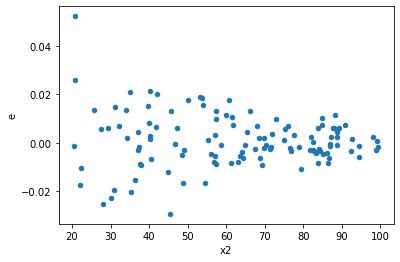

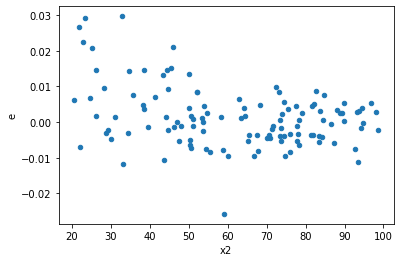

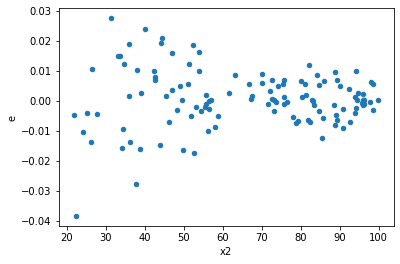

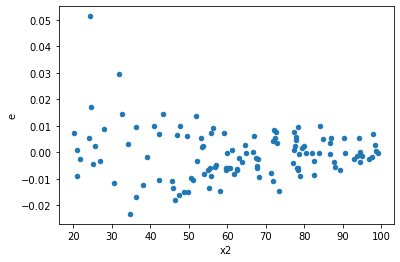

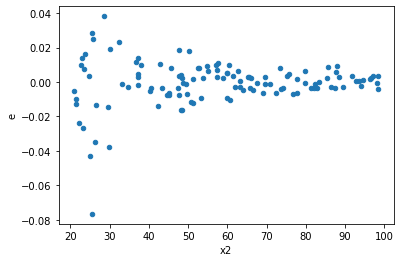

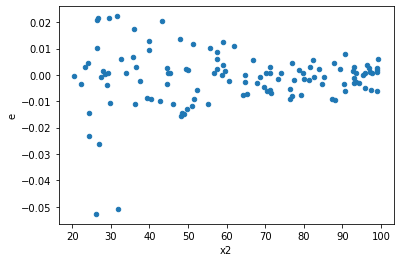

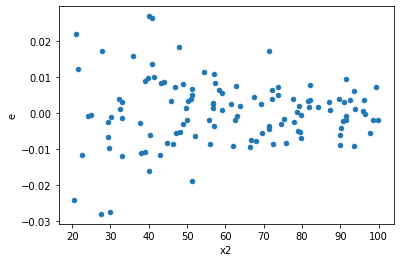

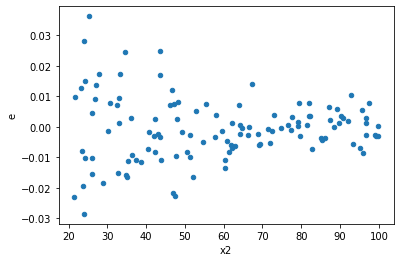

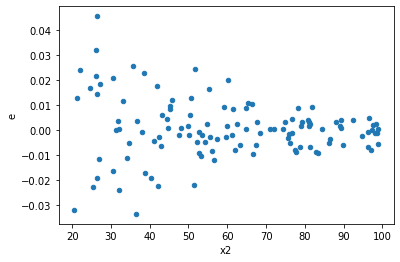

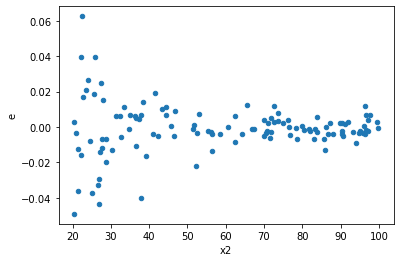

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.009807772861427193,0.0010651064547247398,0.00022290392866879984,2.4206964880107722e-05,0.1085981975493822,1.7012889932184527e-11,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,0.0043163828419809725,0.001146802896740387,9.80996100450221e-05,2.606370219864516e-05,0.26568609382528036,2.3783481809246653e-05,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,0.008074035568574677,0.001389767029198479,0.00018350080837669722,3.158561429996543e-05,0.17212793000413013,4.157878267741429e-08,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,0.007139144540516174,0.0012388608948258563,0.00016225328501173124,2.815592942786037e-05,0.17353072035382605,4.7284931284862015e-08,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,0.01805583211530721,0.0006962902215262058,0.00041035982080243655,1.5824777761959223e-05,0.03856317543714373,3.3710800400251084e-20,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,0.01114596965031306,0.0007431227106964818,0.00025331749205256956,1.6889152515829132e-05,0.06667187638319197,1.868952903800176e-15,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,0.007288770033066063,0.0013400881552031022,0.00016565386438786506,3.0456548981888687e-05,0.18385655592420805,1.169752578622329e-07,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,0.00953964397539267,0.0010742488834033993,0.00021681009034983342,2.4414747350077257e-05,0.11260890722697868,3.247680800141474e-11,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,0.013673416288313974,0.0010062245221265627,0.00031075946109804486,2.286873913924006e-05,0.07358984038148063,1.250323064337035e-14,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64